In [ ]:
"""Esse é o desafio 5 do curso ANALISTA DE DADOS - DNC.
Nele vou aplicar os conhecimentos de limpeza e organização
(data cleaning & data wrangling).
Nesse desafio fictício, uma suposta empresa do ramo
de e-commerce me contratou como analista de dados
para que eu pudesse levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente."""

'Esse é o desafio 5 do curso ANALISTA DE DADOS - DNC.\nNele vou aplicar os conhecimentos de limpeza e organização\n(data cleaning & data wrangling).\nNesse desafio fictício, uma suposta empresa do ramo\nde e-commerce me contratou como analista de dados\npara que eu pudesse levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.\nA saber RFM:\n- R (Recency): Tempo que o cliente realizou a última compra (em dias)\n- F (Frequency): Quantidade de compras realizadas pelo cliente\n- M (Monetary): Valor do ticket médio gasto pelo cliente\nonde ticket médio = média do total gasto por pedido para cada cliente.'

In [ ]:
# 1 - Importar bibliotecas

!pip install ydata-profiling
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn import set_config


In [ ]:
# 2 - Importar dataset

data = pd.read_csv('/content/dados.csv', header= 0,
                        encoding= 'unicode_escape')

In [ ]:
# 3 - Ler o dataset
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
# 4 - Explorando o dataset
# 4.1. info
data.info()
# há 541909 entradas, mas em description tem 540455 e customerID TEM 406829,
#ou seja: há nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# 4.2. describe
data.describe()
# a média de quantidade por clientes é 9,5
# com alto desvio-padrão (218,08);
# a média do preço unitário é $ 4,61
# com alto desvio-padrão ($96,75)

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
# 5 - Verificando os dados nulos
#5.1. Total de nulos
data.isnull().sum()
# Há 1444 dados nulos em description e 128770 em CustomerID

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# 5.2. Dados nulos
data[data['Description'].isnull()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

In [ ]:
data[data['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kingdom  
1443    12/1/2010 14:32       2.51         NaN  United Kingdom  
1444    12/1/2010 14:32       2.51         NaN  United Kingdom  
1445    12/1/2010 14:32       0.85         NaN  United Kingdom  
1446    12/1/2010 14:32       1.66         NaN  United Kingdom  
...                 ...        ...         ...             ...  
541536  12/9/2011 10:26       4.13         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541538  12/9/2011 10:26       4.96         NaN  United Kingdom  
541539  12/9/2011 10:26      10.79         NaN  United Kingdom  
541540  12/9/2011 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [ ]:
# 6 - Eliminando os nulos
data_sem_nulos = data.dropna()

In [ ]:
# 7 - Filtrando dados nulos ou menor que zero em UnitPrice
#7.1. Filtro de preços >=0
data_sem_nulos[data_sem_nulos['UnitPrice'] <= 0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

             InvoiceDate  UnitPrice  CustomerID         Country  
9302     12/5/2010 14:02        0.0     12647.0         Germany  
33576   12/16/2010 14:36        0.0     16560.0  United Kingdom  
40089   12/21/2010 13:45        0.0     14911.0            EIRE  
47068     1/6/2011 16:41        0.0     13081.0  United Kingdom  
47070     1/6/2011 16:41        0.0     13081.0  United Kingdom  
56674    1/13/2011 15:10        0.0     15107.0  United Kingdom  
86789    2/10/2011 13:08        0.0     17560.0  United Kingdom  
130188   3/23/2011 10:25        0.0     13239.0  United Kingdom  
139453   3/30/2011 12:45        0.0     13113.0  United Kingdom  
145208    4/4/2011 14:42        0.0     14410.0  United Kingdom  
157042   4/14/2011 18:57        0.0     12457.0     Switzerland  
187613   5/12/2011 15:21        0.0     17667.0  United K

In [ ]:
#7.2. Novo dataset com preços maior que zero
data_novo = data_sem_nulos[data_sem_nulos['UnitPrice'] > 0]
data_novo[data_novo['UnitPrice'] <= 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
#7.3. Filtro de quantidade >=0
data_novo[data_novo['Quantity'] <= 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

In [ ]:
# 7.4. Novo dataset com quantidade maior que zero
data_novoquant = data_novo[data_novo['Quantity'] > 0]
data_novoquant[data_novoquant['Quantity'] <= 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
# 8 - Verificando linhas duplicadas
df = data_novoquant.copy()
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
df[df.duplicated]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5192 rows x 8 columns]

In [ ]:
# 8.1. Total de linhas duplicadas
df.duplicated().sum()
# 5192 linhas duplicadas

np.int64(5192)

In [ ]:
#8.2. Removendo valores duplicados
df.drop_duplicates(inplace=True)

In [ ]:
# 8.3. Conferindo se ainda há valores duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
# 9. Tipos de dados da coluna
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#9.1. Corrigindo InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

In [ ]:
#9.2. Corrigindo StockCode
df['StockCode'] = df['StockCode'].astype(str)

In [ ]:
#9.3. Corrigindo Quantity
df['Quantity'] = df['Quantity'].astype(int)

In [ ]:
#9.4. Corrigindo Description
df['Description'] = df['Description'].astype(str)

In [ ]:
# 9.4. Corrigind Datetime
df['InvoiceDate'] = df['InvoiceDate'].astype(object)

In [ ]:
#9.5. Corrigindo CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
#9.6. Corrigindo Country
df['Country'] = df['Country'].astype(str)

In [ ]:
#9.7. Corrigindo InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#9.8. Conferindo dtypes
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [ ]:
#9.6. Novo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [ ]:
#9.7. Novo dataset
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [ ]:
# 10. Tratando os outliers
#10.1. Verificando report
df.report = ProfileReport(df)
df.report
# Alta correlação entre país e número do Invoice
# Sem nulos ou duplicadas

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

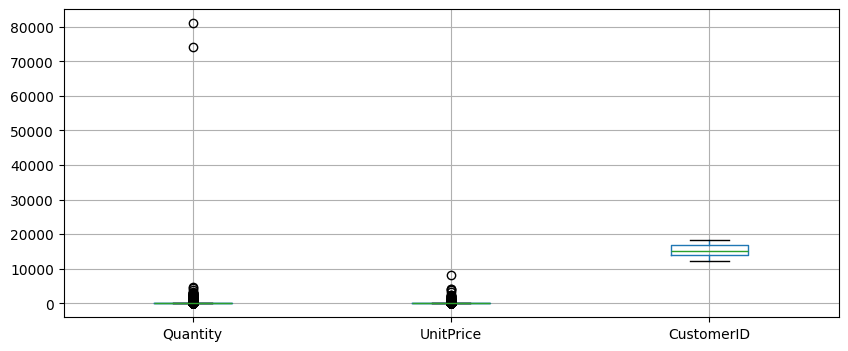

' Há bastantes outliers nas colunas UnitPrice e Quantity (especialmente)'

In [ ]:
#10.2. Verificando outliers com boxplot

df.boxplot(figsize=(10,4))

plt.show()
""" Há bastantes outliers nas colunas UnitPrice e Quantity (especialmente)"""

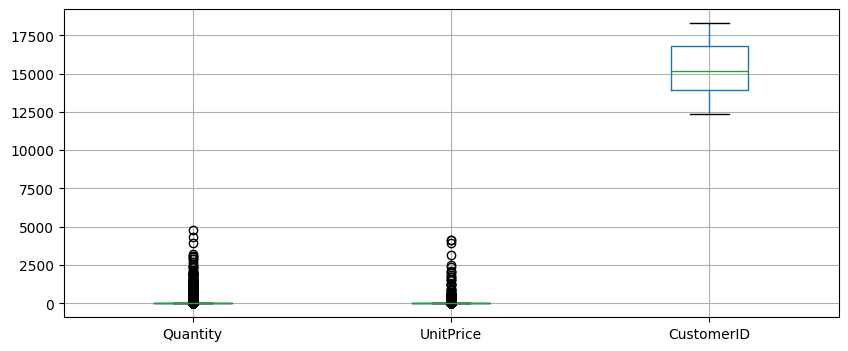

In [ ]:
#10.3. Removendo outliers extremos em quantidade
#maior que 10000 e preço unitário maior que 5000
df_sem_outliers = df[(df['Quantity'] < 10000) & (df['UnitPrice'] < 5000)]
df_sem_outliers.boxplot(figsize=(10,4))
plt.show()

In [ ]:
# 11. Coluna adicional - total_purchase
df_final = df_sem_outliers.copy()

df_final['total_purchase'] = df_final['Quantity'] * df_final['UnitPrice']
df_final['total_purchase'] = df_final['total_purchase'].astype(float)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       392689 non-null  object        
 1   StockCode       392689 non-null  object        
 2   Description     392689 non-null  object        
 3   Quantity        392689 non-null  int64         
 4   InvoiceDate     392689 non-null  datetime64[ns]
 5   UnitPrice       392689 non-null  float64       
 6   CustomerID      392689 non-null  int64         
 7   Country         392689 non-null  object        
 8   total_purchase  392689 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [ ]:
df_final.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  total_purchase  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom           15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom           20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom           22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom           20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom           20.34

In [ ]:
#11.1. Novo report com df_final
df_final.report = ProfileReport(df_final)
df_final.report
#Média de compra total é de $21,98 entre os clientes

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:05<00:00,  1.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 12 - Criando uma última data de compra
df_final.max()
# Data da última compra é 06-12-2010 13:00

InvoiceNo                                   581587
StockCode                                     POST
Description       ZINC WIRE SWEETHEART LETTER TRAY
Quantity                                      4800
InvoiceDate                    2011-12-09 12:50:00
UnitPrice                                  4161.06
CustomerID                                   18287
Country                                Unspecified
total_purchase                             38970.0
dtype: object

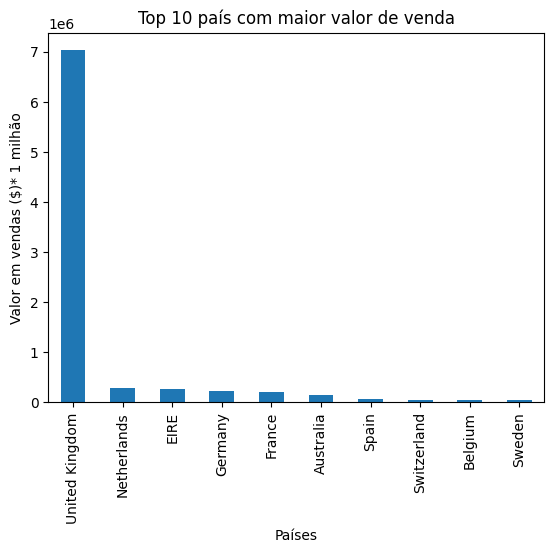

In [ ]:
#13 - Plotagem dos gráficos
# 13.1. Top 10 países com maior valor em vendas
df_final.groupby('Country')['total_purchase'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title ('Top 10 país com maior valor de venda')
plt.ylabel('Valor em vendas ($)* 1 milhão')
plt.xlabel ('Países')
plt.show()

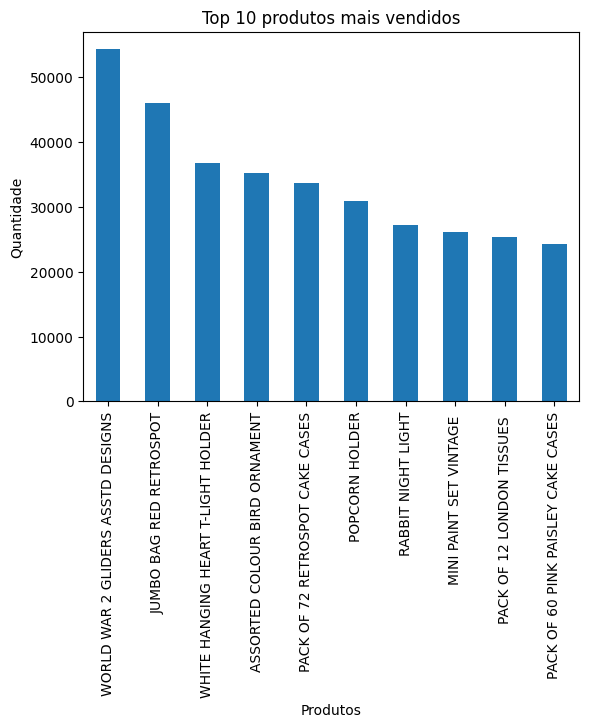

In [ ]:
# 13.2. Top 10 produtos mais vendidos
df_final.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title ('Top 10 produtos mais vendidos')
plt.ylabel('Quantidade')
plt.xlabel ('Produtos')
plt.show()

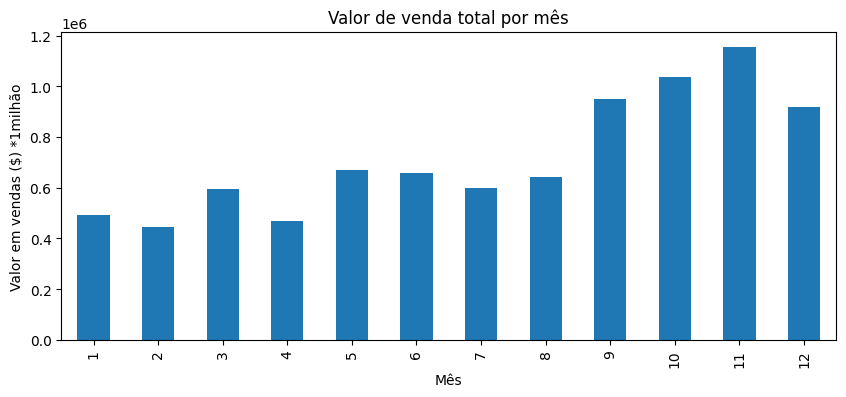

In [ ]:
# 13.3. Valor de venda total por mês
df_final['InvoiceMonth'] = df_final['InvoiceDate'].dt.month
fig = plt.figure(figsize=(10,4))
df_final.groupby('InvoiceMonth')['total_purchase'].sum().plot(kind='bar')
plt.title ('Valor de venda total por mês')
plt.ylabel('Valor em vendas ($) *1milhão')
plt.xlabel ('Mês')
plt.show()


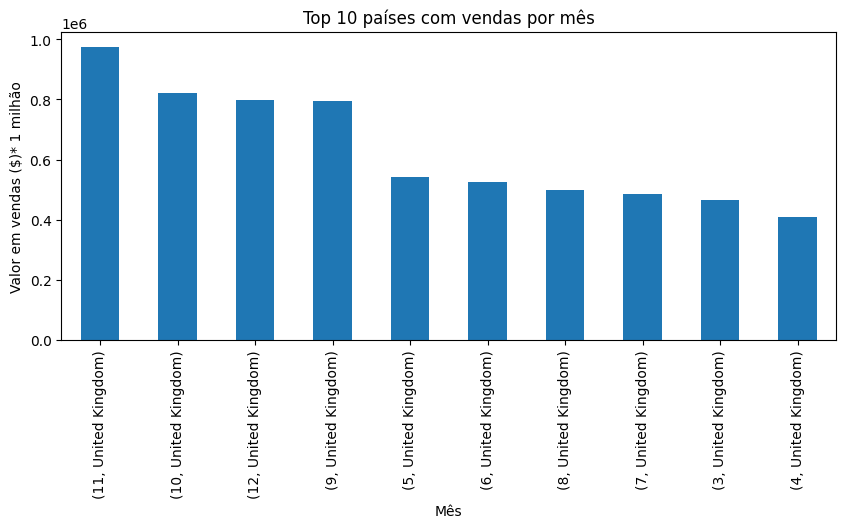

In [ ]:
# 13.3. Valor de venda total por mês e país
fig = plt.figure(figsize=(10,4))
df_final.groupby(['InvoiceMonth','Country'])['total_purchase'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title ('Top 10 países com vendas por mês')
plt.ylabel('Valor em vendas ($)* 1 milhão')
plt.xlabel ('Mês')
plt.show()

In [ ]:
# 14 - Cálculo do RFM
# 14.1. Agrupando dados por CustomerId e InvoiceNumber obtendo a data e o preço total do pedido
df_final.groupby(['CustomerID','InvoiceNo']).agg({'InvoiceDate':'max',
                                                    'InvoiceNo':'count',
                                                    'total_purchase':'sum'})

InvoiceDate  InvoiceNo  total_purchase
CustomerID InvoiceNo                                               
12347      537626    2010-12-07 14:57:00         31          711.79
           542237    2011-01-26 14:30:00         29          475.39
           549222    2011-04-07 10:43:00         24          636.25
           556201    2011-06-09 13:01:00         18          382.52
           562032    2011-08-02 08:48:00         22          584.91
...                                  ...        ...             ...
18283      579673    2011-11-30 12:59:00         50          220.31
           580872    2011-12-06 12:02:00         50          208.00
18287      554065    2011-05-22 10:39:00         29          765.28
           570715    2011-10-12 10:23:00         38         1001.32
           573167    2011-10-28 09:29:00          3           70.68

[18529 rows x 3 columns]

In [ ]:
# 14.1. Agrupando dados por CustomerId e InvoiceNumber obtendo a data e o preço total do pedido
df_final.groupby(['CustomerID']).agg({'InvoiceDate':'max',
                                                    'InvoiceNo':'count',
                                                    'total_purchase':'sum'})

InvoiceDate  InvoiceNo  total_purchase
CustomerID                                               
12347      2011-12-07 15:52:00        182         4310.00
12348      2011-09-25 13:13:00         31         1797.24
12349      2011-11-21 09:51:00         73         1757.55
12350      2011-02-02 16:01:00         17          334.40
12352      2011-11-03 14:37:00         85         2506.04
...                        ...        ...             ...
18280      2011-03-07 09:52:00         10          180.60
18281      2011-06-12 10:53:00          7           80.82
18282      2011-12-02 11:43:00         12          178.05
18283      2011-12-06 12:02:00        721         2045.53
18287      2011-10-28 09:29:00         70         1837.28

[4337 rows x 3 columns]

In [ ]:
# 14.1. Cálculo da RECÊNCIA (data da última compra do cliente em relação à data máxima de compra)
df_final['recencia']= df_final['InvoiceDate'].max() - df_final['InvoiceDate']
df_final


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55       17850  United Kingdom   
1      2010-12-01 08:26:00       3.39       17850  United Kingdom   
2      2010-12-01 08:26:00       2.75       17850  United Kingdom   
3      2010-12-01 08:26:00       3.39       17850  United Kingdom   
4      2010-12-01 08:26:00       3.39       17850  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85       12680          France   
541905 2011-12-09 12:50:00       2.10       12680          France   
541906 2011-12-09 12:50:00       4.15       12680          France   
541907 2011-12-09 12:50:00       4.15       12680          France   
541908 2011-12-09 12:50:00       4.95       12680          France   

        total_purchase  InvoiceMonth          recencia  
0                15.30            12 373 days 04:24:00  
1                20.34            12 373 days 04:24:00  
2                22.00            12 373 days 04:24:00  
3                20.34            12 373 days 04:24:00  
4                20.34            12 373 days 04:24:00  
...                ...           ...               ...  
541904           10.20            12   0 days 00:00:00  
541905           12.60            12   0 days 00:00:00  
541906           16.60            12   0 days 00:00:00  
541907           16.60            12   0 days 00:00:00  
541908           14.85            12   0 days 00:00:00  

[392689 rows x 11 columns]

In [ ]:
df_final.groupby(['CustomerID']).agg({'recencia':'max'})

recencia
CustomerID                  
12347      366 days 21:53:00
12348      357 days 17:41:00
12349       18 days 02:59:00
12350      309 days 20:49:00
12352      296 days 00:17:00
...                      ...
18280      277 days 02:58:00
18281      180 days 01:57:00
18282      125 days 23:15:00
18283      336 days 22:36:00
18287      201 days 02:11:00

[4337 rows x 1 columns]

In [ ]:
# 14.2. Cálculo da FREQUÊNCIA (quantidade de compras pelo cliente)
df_final.groupby(['CustomerID']).agg({'Quantity':'sum'})

Quantity
CustomerID          
12347           2458
12348           2341
12349            631
12350            197
12352            536
...              ...
18280             45
18281             54
18282            103
18283           1357
18287           1586

[4337 rows x 1 columns]

In [ ]:
# 14.3. Cálculo da MÉDIA (ticket médio do cliente)
df_final.groupby(['CustomerID']).agg({'total_purchase':'mean'})

total_purchase
CustomerID                
12347            23.681319
12348            57.975484
12349            24.076027
12350            19.670588
12352            29.482824
...                    ...
18280            18.060000
18281            11.545714
18282            14.837500
18283             2.837074
18287            26.246857

[4337 rows x 1 columns]